In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [125]:
google = pd.read_csv('./tp_google_trends_n.csv')
nyt = pd.read_csv('./tp_nyt_n.csv')
cdc = pd.read_csv('./tp_cdc_n.csv')
guardian = pd.read_csv('./tp_guardian_n.csv')

In [127]:
google_avg = list(map(float, google.iloc[14, 1:].values))
nyt_avg = list(map(float, nyt.iloc[19, 1:].values))
cdc_avg = list(map(float, cdc.iloc[19, 1:14].values))
guardian_avg = list(map(float, guardian.iloc[19, 1:].values))

In [73]:
stats.chisquare(google_avg, f_exp=cdc_avg)

Power_divergenceResult(statistic=49.242277313641729, pvalue=1.8971729992744484e-06)

In [75]:
stats.chisquare(nyt_avg, f_exp=cdc_avg)

Power_divergenceResult(statistic=1204.4990238608584, pvalue=1.8606978822770341e-250)

In [74]:
stats.chisquare(guardian_avg, f_exp=cdc_avg)

Power_divergenceResult(statistic=1198.7586340208397, pvalue=3.2050108951618357e-249)

In [76]:
stats.chisquare(guardian_avg, f_exp=nyt_avg)

Power_divergenceResult(statistic=0.056978929525666716, pvalue=0.99999999999927525)

In [17]:
sum = 0
for i in range(13):
    sum+=((guardian_avg[i] - nyt_avg[i])**2)
print(sum)

0.008439032395095032


In [18]:
sum = 0
for i in range(13):
    sum+=((guardian_avg[i] - cdc_avg[i])**2)
print(sum)

0.28406718746180026


In [11]:
nyt_avg

[0.012451975823529412,
 0.2005011240588235,
 0.023220094235294118,
 0.033706173470588234,
 0.03429426711764706,
 0.22074866511764707,
 0.002911403882352941,
 0.01974105223529412,
 0.002380666176470588,
 0.04285397564705882,
 0.055810967647058826,
 0.10395069311764707,
 0.3062524710588235]

In [13]:
guardian_avg

[0.004943649117647058,
 0.1410140102352941,
 0.02650687735294118,
 0.021648933764705884,
 0.024504115529411768,
 0.2817598050588236,
 0.001316163411764706,
 0.01690009029411765,
 0.0015528617058823532,
 0.0390926835882353,
 0.06235579994117647,
 0.13222965570588238,
 0.30499888158823524]

In [72]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for year in range(2004, 2017):
    google.plot(kind='bar', x='Cause of Death', width=0.75)
    plt.ylabel('Normalized frequency')
    plt.title(year)
    axes = plt.gca()
    axes.set_ylim([0.0, 0.5])
    plt.legend(loc="upper left")
    fig = plt.gcf()
    fig.set_size_inches(11, 7)
    plt.savefig(str(year) + "_all.png")

KeyError: 'Cause of Death'

In [7]:
google = google.transpose()
cdc = cdc.transpose()
nyt = nyt.transpose()
guardian = guardian.transpose()

In [5]:
google_plot = google.iloc[1:, 1:]
cdc_plot = cdc.iloc[1:, 1:]
nyt_plot = nyt.iloc[1:, 1:]
guardian_plot = guardian.iloc[1:, 1:]

In [8]:
wordList = []
for w in google[0].iloc[1:]:
    wordList.append(w)

In [9]:
wordList

["Alzheimer's Disease",
 'Cancer',
 'Car Accidents',
 'Diabetes',
 'Heart Disease',
 'Homicide',
 'Kidney Disease',
 'Lower Respiratory Disease',
 'Overdose',
 'Pneumonia & Influenza',
 'Stroke',
 'Suicide',
 'Terrorism']

In [105]:
google_plot['Word'] = wordList

In [108]:
cdc_plot['Word'] = wordList
guardian_plot['Word'] = wordList
nyt_plot['Word'] = wordList

In [21]:
value_dict = {}
count = 0
for i in ['CDC', 'Guardian', 'NYT']:
    value_dict[i] = count
    count += 1

In [20]:
plotList = [cdc_plot, guardian_plot, nyt_plot]
sourceList = ['CDC', 'Guardian', 'NYT']

c:\users\owen\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


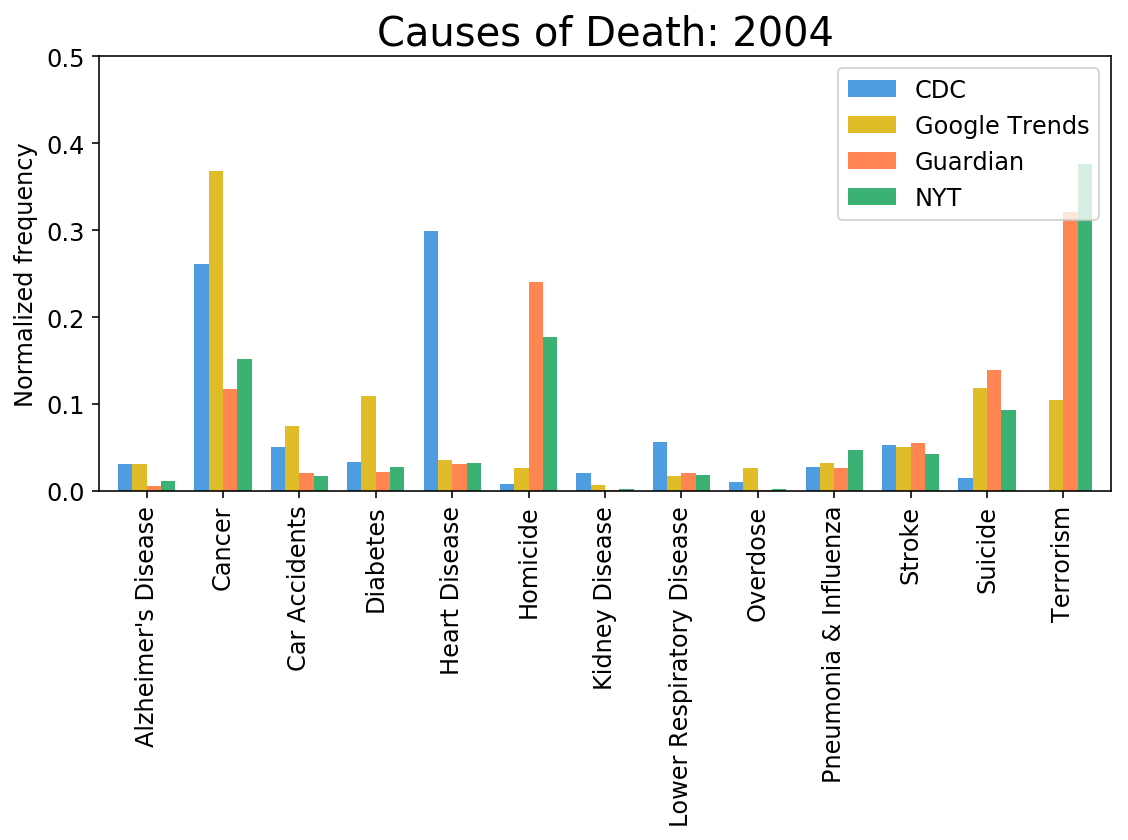

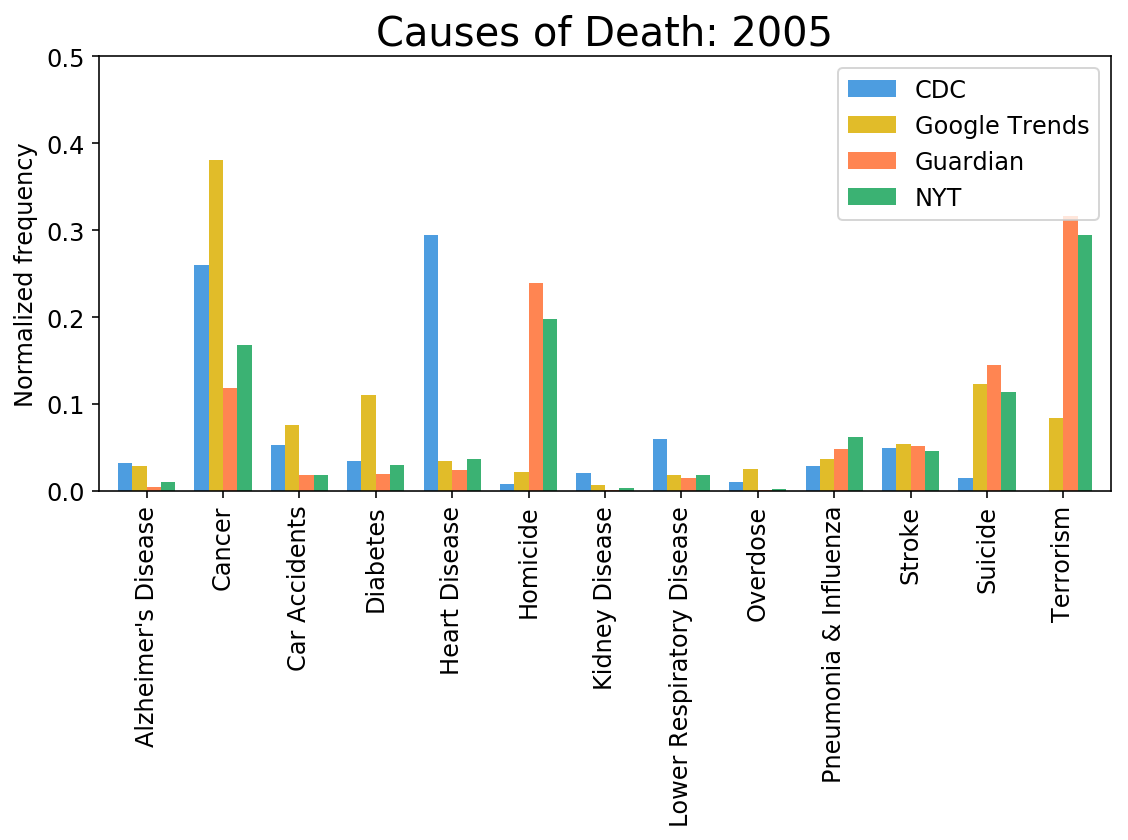

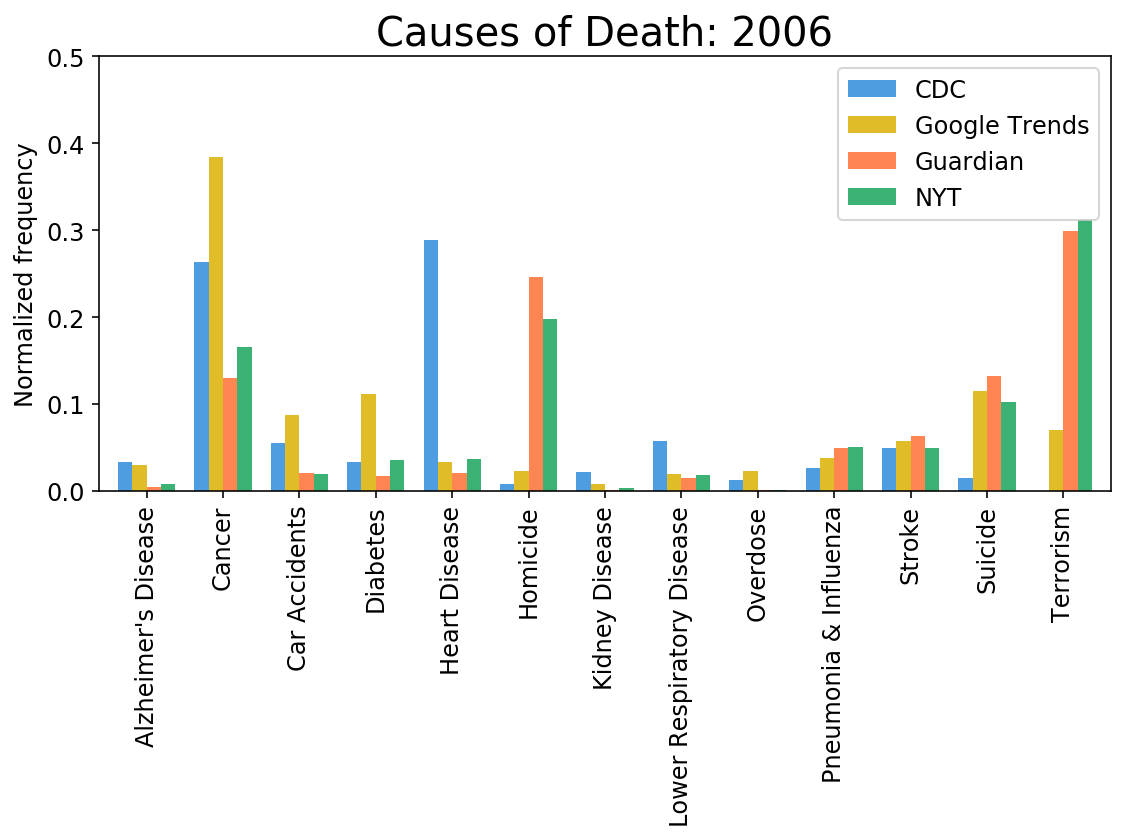

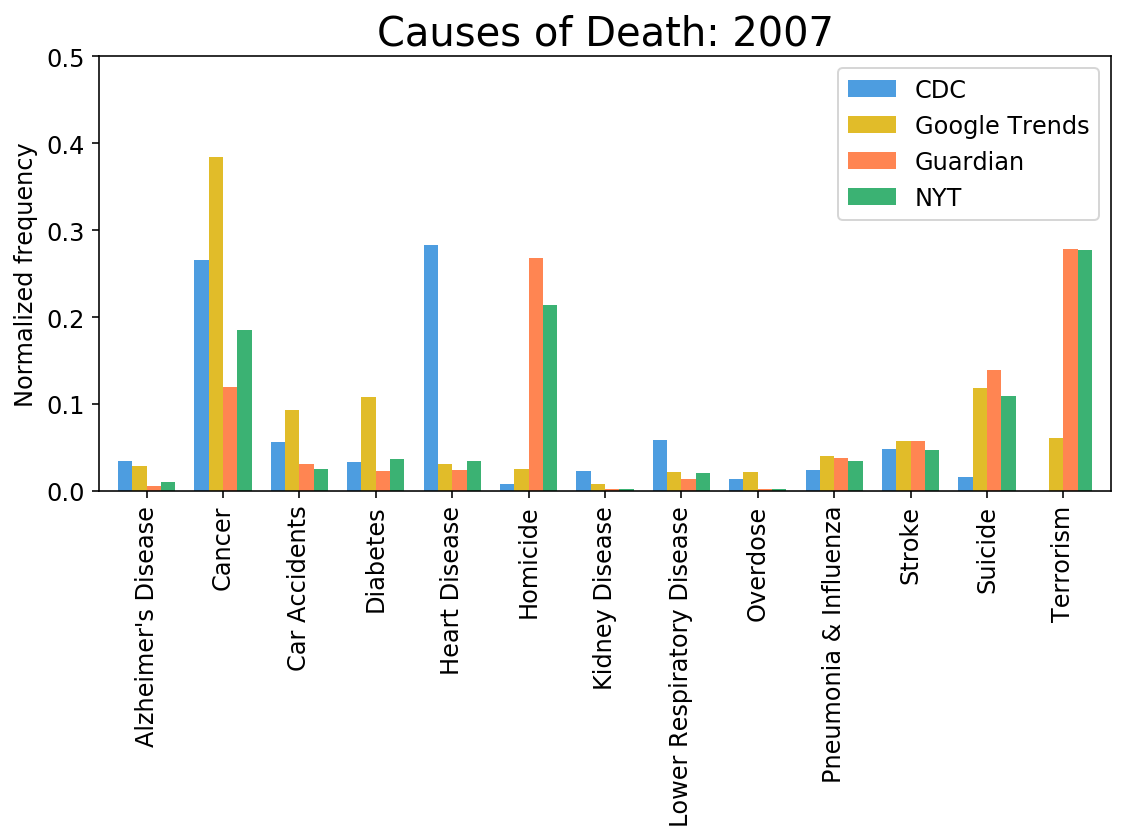

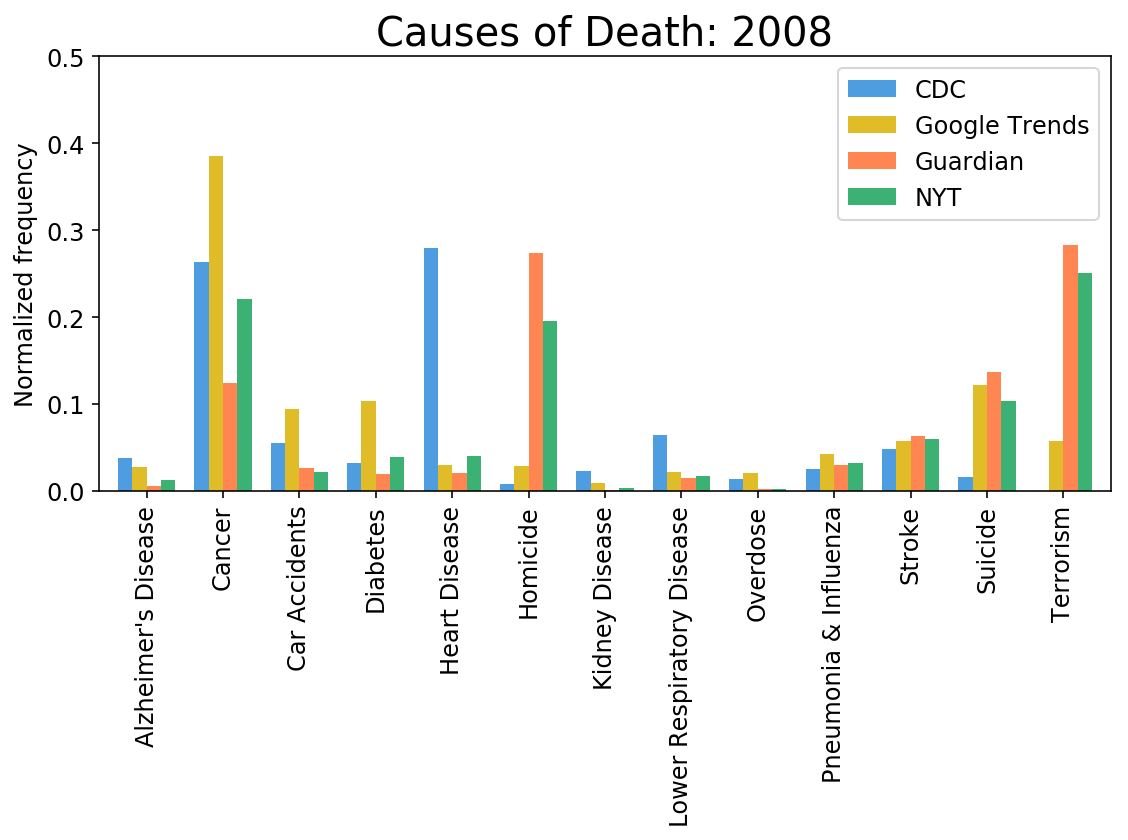

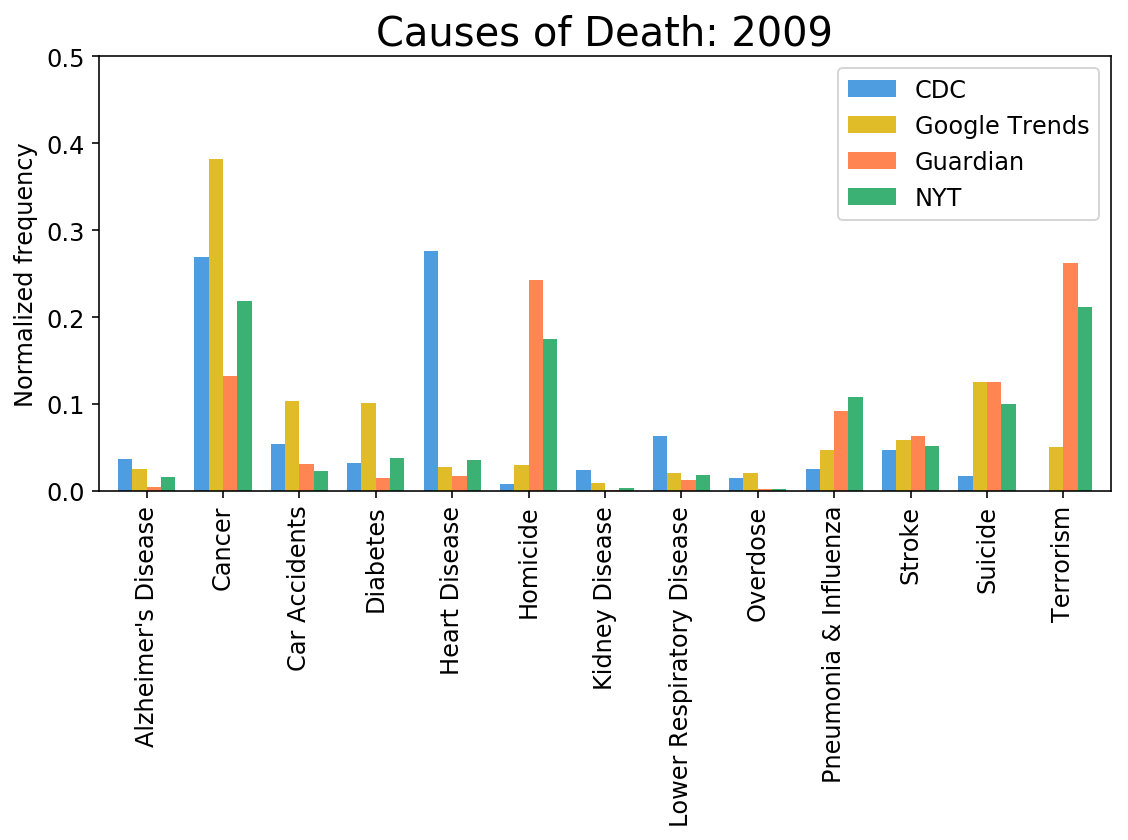

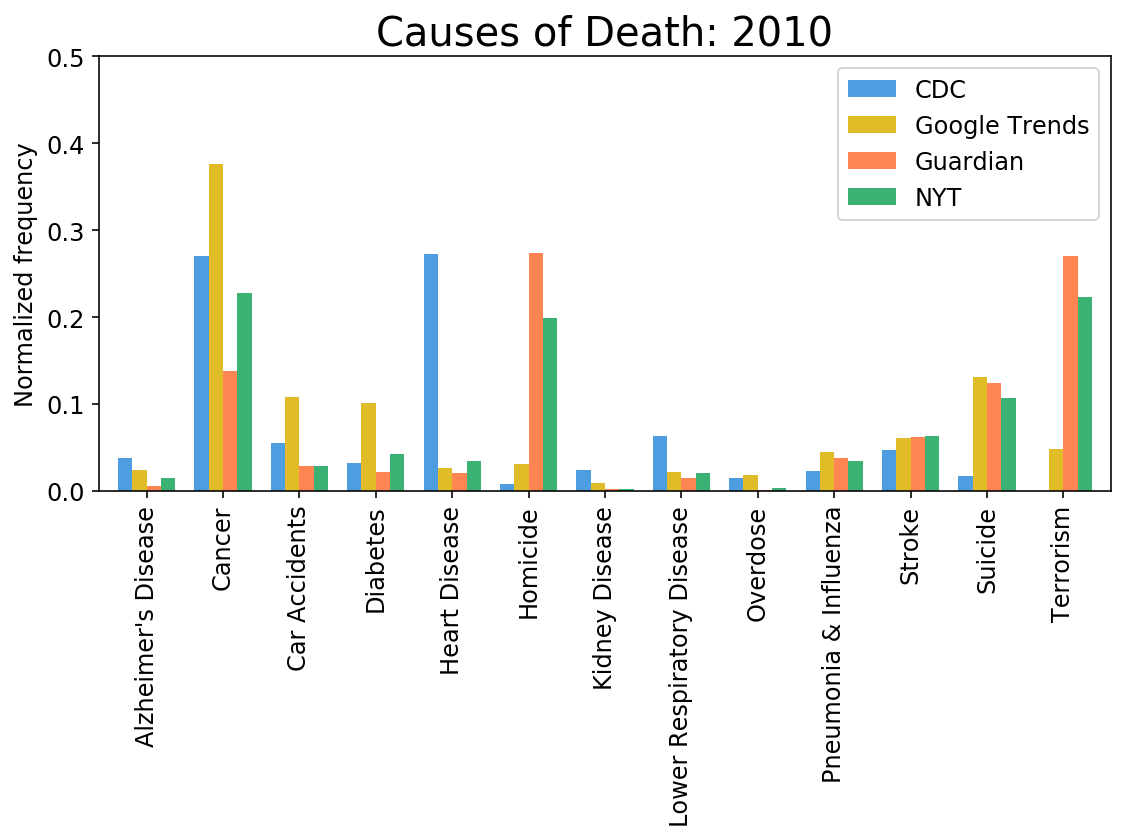

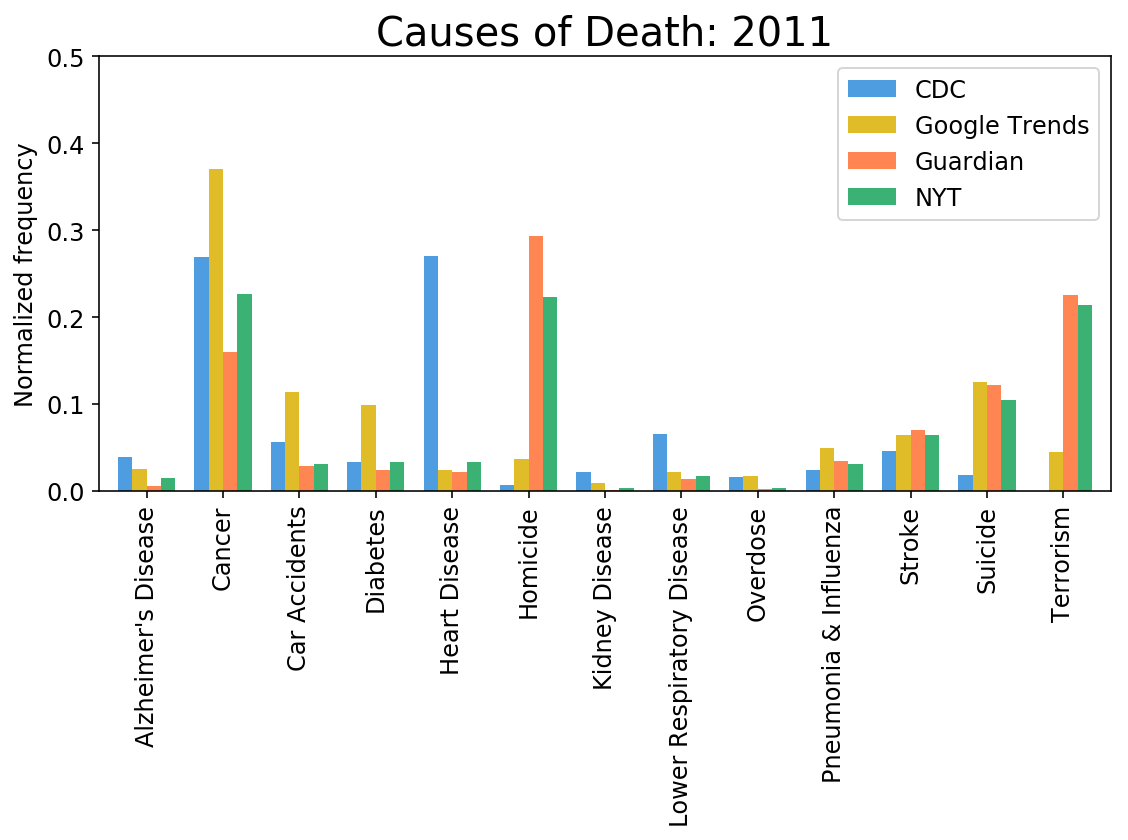

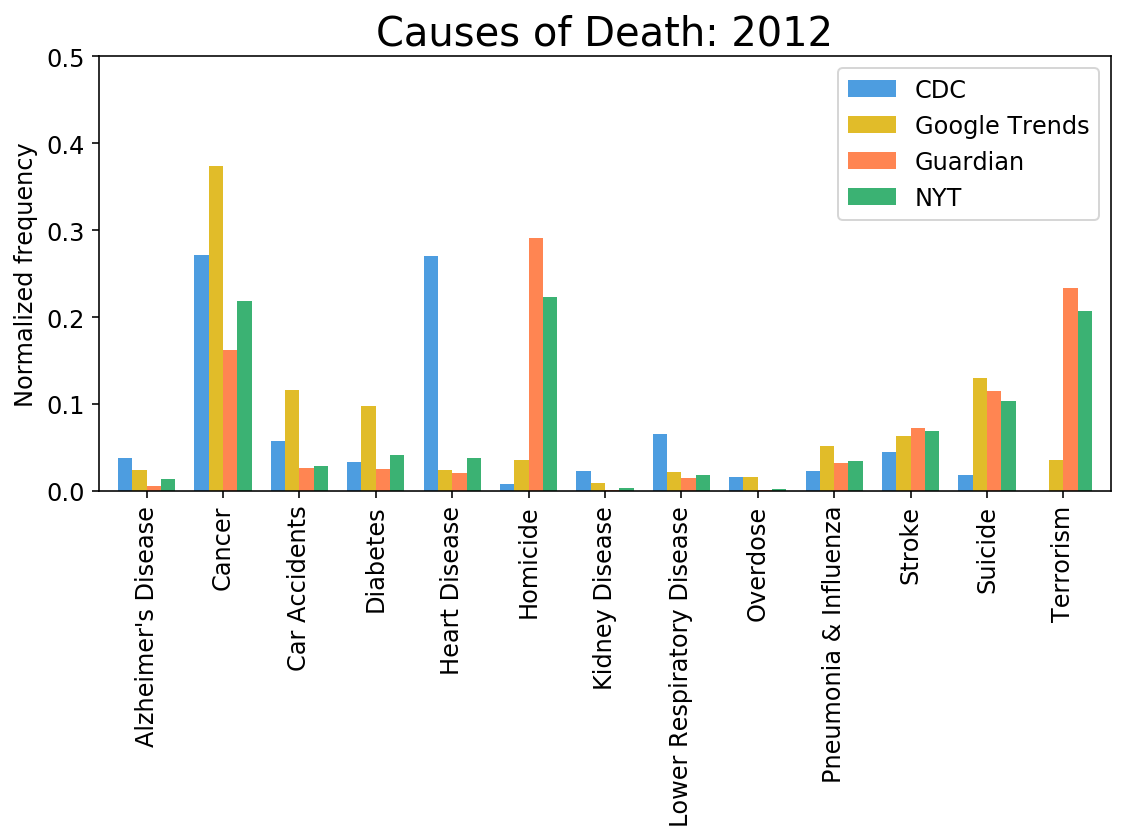

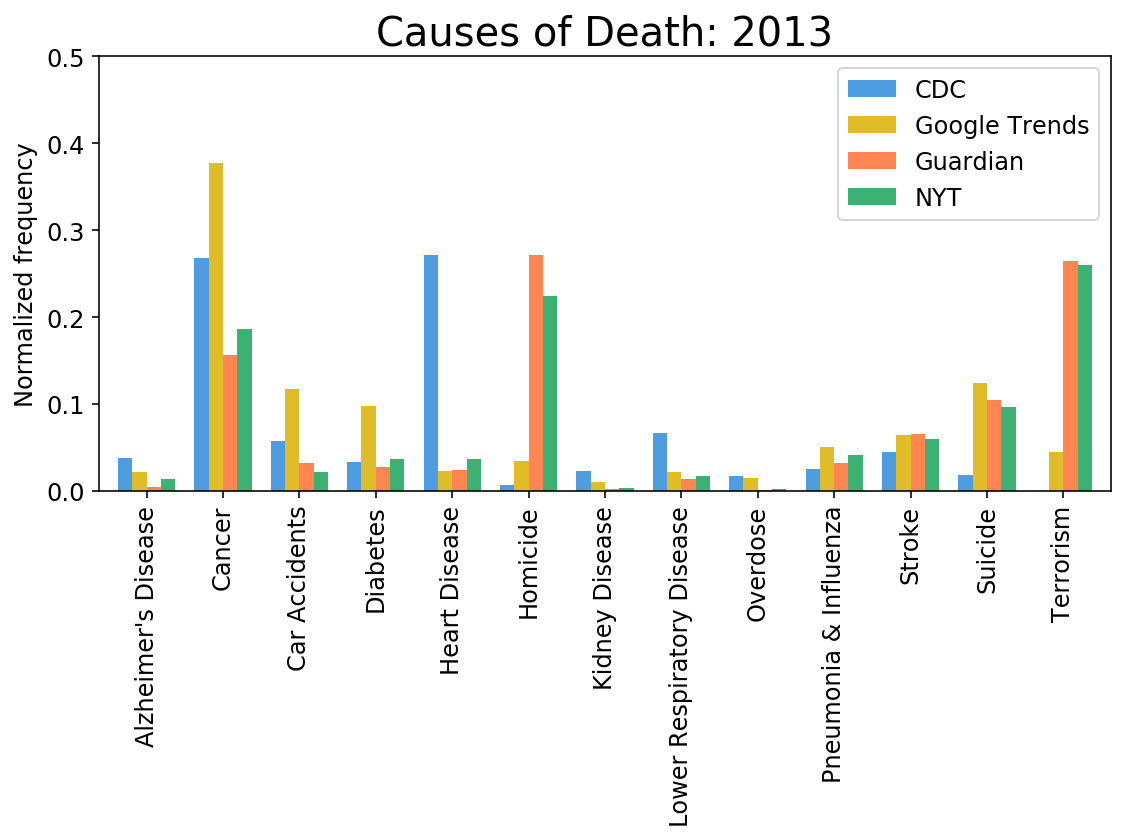

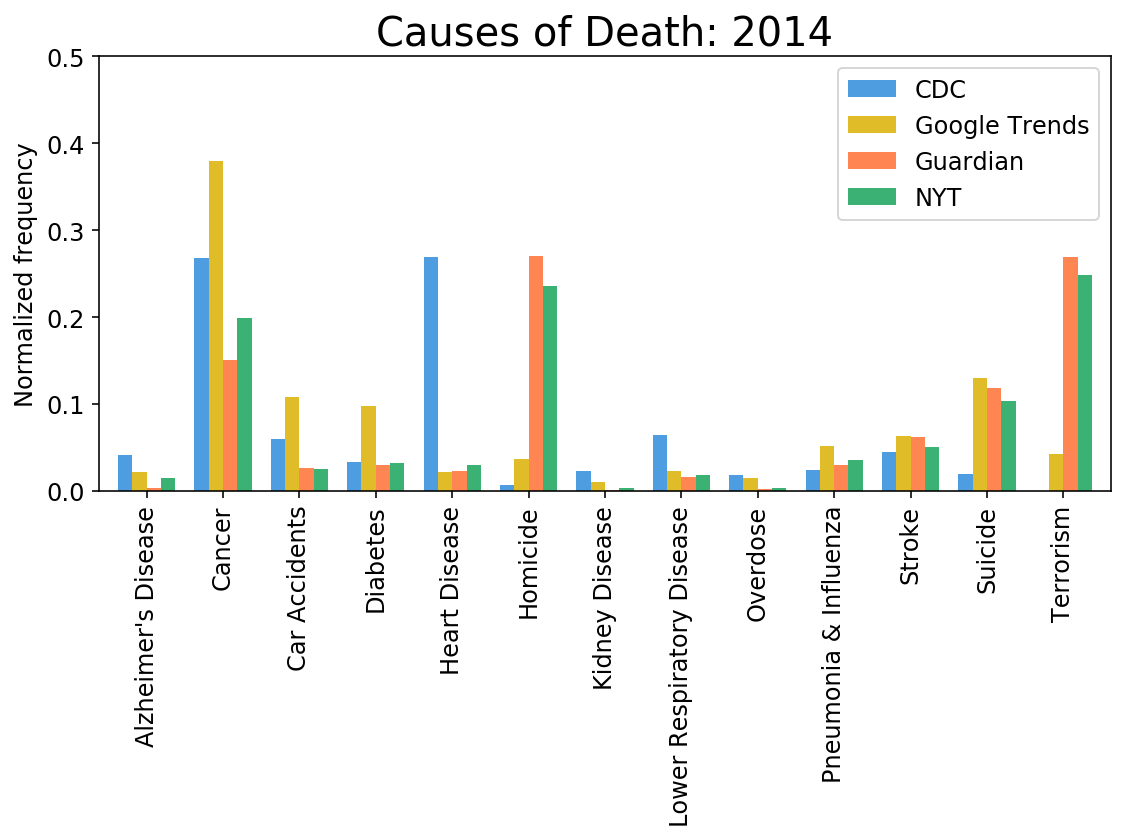

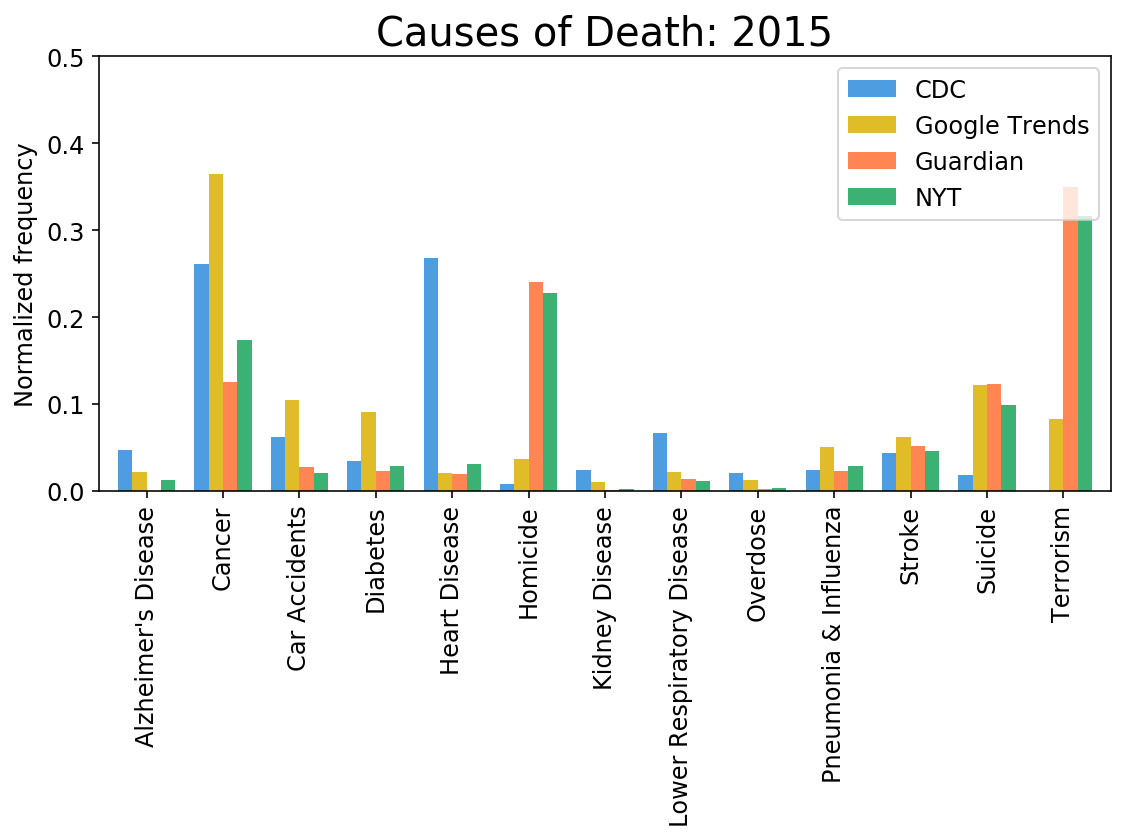

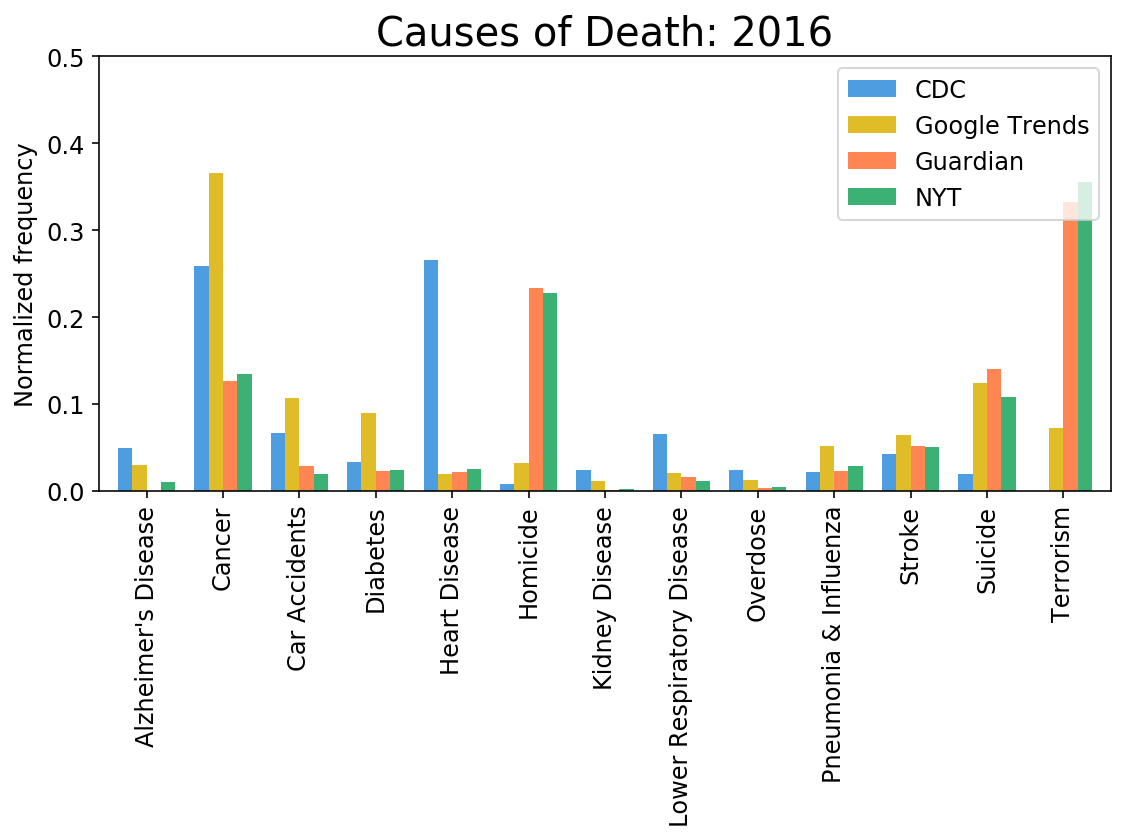

In [39]:
plt.rcParams.update({'font.size': 12})

for count in range(6, 19):
# for count in range(1, 6):

    plot_dict = {}
    for i in sourceList:
        temp_dict = {}
        for j in range(13):
            temp_dict[wordList[j]] = float(plotList[value_dict[i]][count][j])
        plot_dict[i] = temp_dict

    google_dict = {}
    for j in range(13):
        google_dict[wordList[j]] = float(google_plot[count-5][j])
    plot_dict['Google Trends'] = google_dict
        
    df = pd.DataFrame(plot_dict)

    df.plot(kind='bar', width=0.75, color=['#4d9de0','#e1bc29','#ff8552', '#3bb273'])
    plt.ylabel('Normalized frequency')
    plt.title('Causes of Death: ' + str((1998 + count)), fontsize=20)
    
    axes = plt.gca()
    axes.set_ylim([0.0, 0.5])
    plt.legend(loc="upper right")
    
    fig = plt.gcf()
    fig.set_size_inches(8, 6)

    
    plt.savefig('./' + str((1998 + count))+'_all.png')
    
    plt.show()
    

In [182]:
google_plot

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Word
0,0.030356099,0.028816864,0.030126714,0.02898052,0.027964342,0.025529375,0.023736419,0.02489991,0.023740789,0.021542687,0.02114889,0.021581751,0.029242266,0.025974356,Alzheimer's Disease
1,0.367609028,0.380311456,0.384416866,0.384532576,0.384946642,0.381620141,0.376199841,0.369941515,0.37402941,0.377216844,0.379816807,0.364142991,0.365528324,0.37617788,Cancer
2,0.074389123,0.076133444,0.086764935,0.093429737,0.094379653,0.102997823,0.107485669,0.113383517,0.116464247,0.117385661,0.107470892,0.104769589,0.107349897,0.100184937,Car Accidents
3,0.108748224,0.109931001,0.111267996,0.108568815,0.103992396,0.101677339,0.101663528,0.098265715,0.098098732,0.097601561,0.097112252,0.090250957,0.089265864,0.101264952,Diabetes
4,0.036030035,0.034682939,0.032962166,0.030943607,0.02972595,0.027783956,0.026385054,0.024012637,0.023876587,0.02250951,0.02209804,0.020090291,0.019969562,0.02700541,Heart Disease
5,0.026437623,0.021957544,0.023101689,0.02548297,0.028806591,0.030253641,0.030468455,0.036798586,0.03518655,0.034535138,0.036628258,0.036878068,0.032113214,0.030665256,Homicide
6,0.007225133,0.006988744,0.007890925,0.008351813,0.008656816,0.008942297,0.009399416,0.009257271,0.009551565,0.009670003,0.010507782,0.010475449,0.010788609,0.009054294,Kidney Disease
7,0.017586757,0.018517184,0.019558702,0.021351591,0.021421951,0.020692919,0.021581059,0.022098001,0.022186706,0.021997412,0.022754783,0.022005031,0.020737386,0.020960729,Lower Respiratory Disease
8,0.026436144,0.0247294,0.022863449,0.021351591,0.02010142,0.02002779,0.01834766,0.016946778,0.016320391,0.01461573,0.014348557,0.012583715,0.01266208,0.018564208,Overdose
9,0.03214904,0.036437039,0.037633641,0.0403792,0.041890185,0.046780778,0.044440439,0.049571192,0.051518284,0.050121621,0.05108956,0.050268978,0.052198778,0.044959903,Pneumonia & Influenza


In [16]:
avg_list = [cdc_avg, google_avg, guardian_avg, nyt_avg]

c:\users\owen\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


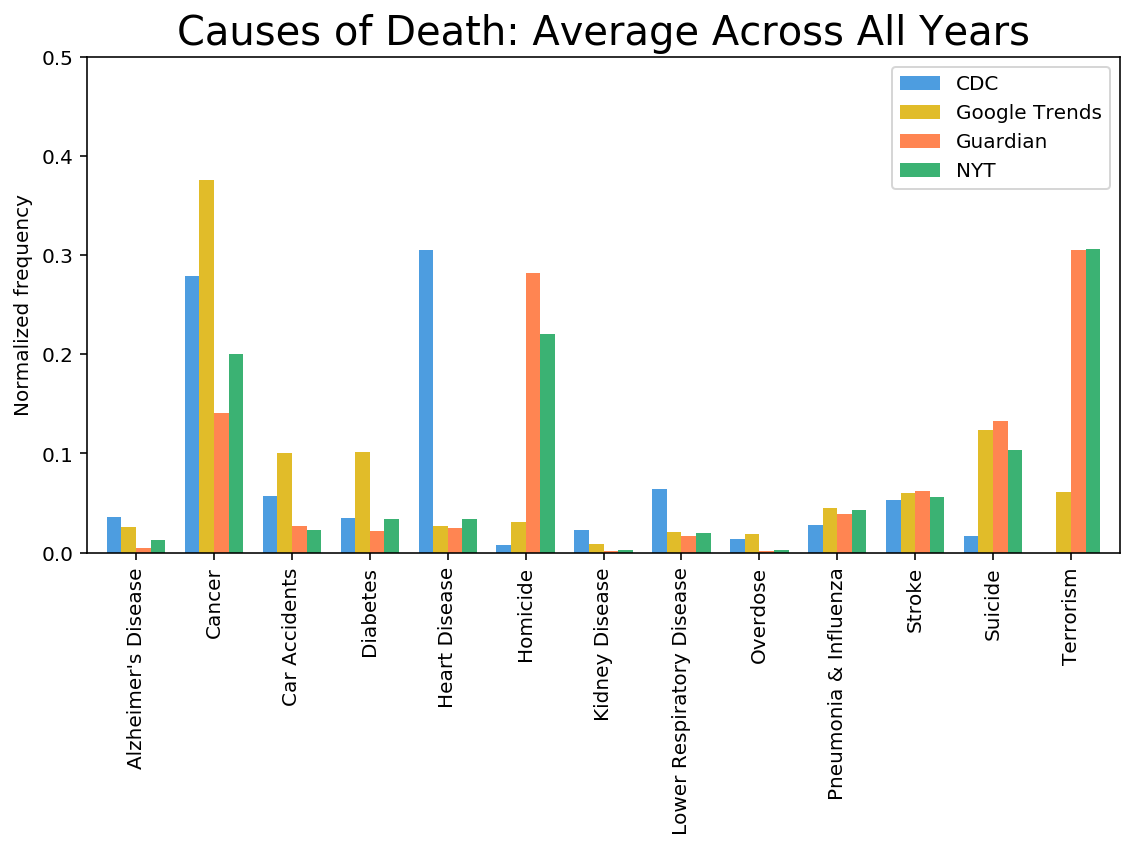

In [38]:
count = 0
plot_dict = {}
for i in ['CDC', 'Google Trends', 'Guardian', 'NYT']:
    temp_dict = {}
    for j in range(13):
        temp_dict[wordList[j]] = float(avg_list[count][j])
    plot_dict[i] = temp_dict
    count += 1

df = pd.DataFrame(plot_dict)

df.plot(kind='bar', width=0.75, color=['#4d9de0','#e1bc29','#ff8552', '#3bb273'])
plt.ylabel('Normalized frequency')
plt.title('Causes of Death: Average Across All Years', fontsize=20)

axes = plt.gca()
axes.set_ylim([0.0, 0.5])
plt.legend(loc="upper right")

fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.savefig('./average_all_test.png')


In [22]:
google_avg_d = dict(zip(wordList, google_avg))
cdc_avg_d = dict(zip(wordList, cdc_avg))

In [18]:
news_avg = []
for i in range(len(guardian_avg)):
    news_avg.append((guardian_avg[i] + nyt_avg[i])/2)

In [21]:
news_avg_d = dict(zip(wordList, news_avg))

In [27]:
for i in cdc_avg_d.keys():
    print(i)
    print("CDC: ", cdc_avg_d[i])
    print("News: ", news_avg_d[i])
    print("Google Trends: ", google_avg_d[i])
    print("Under: ", cdc_avg_d[i]/news_avg_d[i])
    print("Over: ", news_avg_d[i]/cdc_avg_d[i])
    print("Google U: ", cdc_avg_d[i]/google_avg_d[i])
    print("---")

Alzheimer's Disease
CDC:  0.03628674688286333
News:  0.008697812470588234
Google Trends:  0.025974356
Under:  4.1719394394357705
Over:  0.2396966721394316
Google U:  1.39702200442865
---
Cancer
CDC:  0.278526958183555
News:  0.1707575671470588
Google Trends:  0.37617788
Under:  1.6311251257385488
Over:  0.6130737514985033
Google U:  0.7404129083388821
---
Car Accidents
CDC:  0.056812203283014485
News:  0.02486348579411765
Google Trends:  0.100184937
Under:  2.2849653404775387
Over:  0.43764339978610284
Google U:  0.5670733044730515
---
Diabetes
CDC:  0.03488747881302904
News:  0.02767755361764706
Google Trends:  0.101264952
Under:  1.2604971991016205
Over:  0.7933377406254599
Google U:  0.34451681577876064
---
Heart Disease
CDC:  0.3053956745911105
News:  0.029399191323529417
Google Trends:  0.02700541
Under:  10.387893708718764
Over:  0.09626590606724059
Google U:  11.308684985382946
---
Homicide
CDC:  0.00815878138048832
News:  0.2512542350882353
Google Trends:  0.030665256
Under:  0

In [51]:
for i in range(13):
    word = wordList[i]
    ratio = 'Under'
    ratio_val = cdc_avg_d[word]/news_avg_d[word]
    
    if ((news_avg_d[word]/cdc_avg_d[word]) > ratio_val):
        ratio_val = news_avg_d[word]/cdc_avg_d[word]
        ratio = 'Over'
    
    print("<tr> \n  <td>" + word + "</td>\n  <td>%.3f</td>\n  <td>%.3f</td>\n  <td>%.3f</td>\n</tr>" % (
        cdc_avg_d[word], news_avg_d[word], ratio_val))
    print(ratio)
    print()

<tr> 
  <td>Alzheimer's Disease</td>
  <td>0.036</td>
  <td>0.009</td>
  <td>4.172</td>
</tr>
Under

<tr> 
  <td>Cancer</td>
  <td>0.279</td>
  <td>0.171</td>
  <td>1.631</td>
</tr>
Under

<tr> 
  <td>Car Accidents</td>
  <td>0.057</td>
  <td>0.025</td>
  <td>2.285</td>
</tr>
Under

<tr> 
  <td>Diabetes</td>
  <td>0.035</td>
  <td>0.028</td>
  <td>1.260</td>
</tr>
Under

<tr> 
  <td>Heart Disease</td>
  <td>0.305</td>
  <td>0.029</td>
  <td>10.388</td>
</tr>
Under

<tr> 
  <td>Homicide</td>
  <td>0.008</td>
  <td>0.251</td>
  <td>30.796</td>
</tr>
Over

<tr> 
  <td>Kidney Disease</td>
  <td>0.023</td>
  <td>0.002</td>
  <td>10.793</td>
</tr>
Under

<tr> 
  <td>Lower Respiratory Disease</td>
  <td>0.064</td>
  <td>0.018</td>
  <td>3.520</td>
</tr>
Under

<tr> 
  <td>Overdose</td>
  <td>0.014</td>
  <td>0.002</td>
  <td>7.143</td>
</tr>
Under

<tr> 
  <td>Pneumonia & Influenza</td>
  <td>0.028</td>
  <td>0.041</td>
  <td>1.486</td>
</tr>
Over

<tr> 
  <td>Stroke</td>
  <td>0.053</td>
  <

In [82]:
cdc_2 = cdc.iloc[1:14, 1:19]

In [115]:
cdc_2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.020255983306188,0.022516579159238083,0.02444062102741196,0.02646466971538319,0.028579844267164367,0.030381228808212073,0.0324959311439726,0.0332840573170289,0.03440439081012955,0.037505744040984015,0.03651126399044643,0.03829729459478552,0.038678009011547325,0.03792108467985821,0.03784947369643085,0.04124215419833058,0.04713904485459552,0.04890732238696952
1,0.256094737746963,0.2574503988266917,0.2575333090373385,0.25651388916362905,0.256926751341348,0.26135640338571203,0.2600718369807046,0.26376990474579964,0.2660259867659817,0.2638569017211649,0.26907918391642843,0.2704671321383719,0.2693213664888603,0.27098815082287714,0.2679575920863804,0.2679516527548265,0.2610219990168085,0.2585710921805489
2,0.04388402203343038,0.04387320782423638,0.045366189506036415,0.04725390725451868,0.048474085737280896,0.050840026123297175,0.05270133008248454,0.05508559276198581,0.05617681253221148,0.05459728016815822,0.053719894370916316,0.05465072650831088,0.05670793128137576,0.05705868004138642,0.05745536443854255,0.059140017247977586,0.06170187637794974,0.06712051152114692
3,0.031109417149271443,0.031486772111755074,0.03239203750962725,0.0329309039510431,0.03342684749774922,0.03368486792352027,0.03409351878663218,0.0332918691815969,0.03290618266706865,0.03209974839963056,0.03175203970056355,0.031681706888595944,0.03360599810920459,0.033520829687235035,0.033746475904878684,0.033723499752214635,0.033910727403969346,0.033723697196937234
4,0.3283069361824639,0.3216502283553147,0.3164459528333956,0.3120044561853399,0.3071330034440656,0.2990947116903597,0.2945052970015277,0.2888979159323897,0.2826072325191379,0.2793209974839963,0.2756740693909505,0.27284907396449976,0.26986894156877755,0.2701217018490593,0.27105415206944866,0.2689141357581615,0.2681175208054155,0.26516014101457536
5,0.00761782522892363,0.007537633646469989,0.007798015867432824,0.007841483524882167,0.007886176042328634,0.007905613469157285,0.008118196069389771,0.00841521622551842,0.00835585255419134,0.007998434891011088,0.0076485882693301315,0.007342600568583687,0.007287345826663128,0.007455269741751959,0.007083018170355004,0.006889050355982033,0.0074719997203063155,0.008046963296024034
6,0.017120435683750868,0.017887681534751263,0.018867821770270327,0.019384765888422733,0.020137897737329536,0.020610323492268483,0.02093883690173293,0.021830944817448208,0.022426101459577415,0.02297889377732685,0.023696759124465408,0.024363875212484988,0.02216518378358449,0.022290091287721817,0.02279800427043975,0.023211580482625924,0.023544153869046226,0.0235983317178748
7,0.056480336423247075,0.055434547532981125,0.05582920066933498,0.05611412725843897,0.0569200856985481,0.056183050991091735,0.059425267845553215,0.0572485602044319,0.05897131645936076,0.0641922172225685,0.06347773683125689,0.06333497541916762,0.06506402713933214,0.0650580307714071,0.06662180710507586,0.06485671657058002,0.06610364100633448,0.06512214509302892
8,0.005542469296057279,0.005796117687041449,0.006389271760081438,0.007890037602435616,0.008763068375533308,0.009648855355598316,0.010719268450094905,0.012651084907155993,0.013758621611629414,0.014156956772963653,0.014676970770839053,0.015155351410955371,0.016513735577222882,0.016472958721482217,0.017347433583588368,0.01853187613200876,0.020242830397757674,0.02457308296464231
9,0.028985850011302345,0.02967483220927633,0.028154005140282136,0.02952852192396432,0.02934819471423533,0.027479203147323054,0.028593641782726262,0.02588300492101516,0.02430185805468967,0.02560773091044756,0.024813776517031632,0.02297865196678767,0.024500229635600848,0.022958404101645208,0.025441801193258385,0.02434954137662846,0.024329086906711497,0.021709487901753158


In [121]:
cdc_list = pd.DataFrame()

for i in range(1, 19):
    cdc_list[i] = (pd.to_numeric(cdc_2[i]))

In [128]:
news_avg

[0.008697812470588234,
 0.1707575671470588,
 0.02486348579411765,
 0.02767755361764706,
 0.029399191323529417,
 0.2512542350882353,
 0.0021137836470588233,
 0.018320571264705883,
 0.001966763941176471,
 0.04097332961764706,
 0.05908338379411765,
 0.11809017441176473,
 0.3056256763235294]

In [129]:
cdc_avg

[0.03628674688286333,
 0.278526958183555,
 0.056812203283014485,
 0.03488747881302904,
 0.3053956745911105,
 0.00815878138048832,
 0.022814804871242468,
 0.06449634060245525,
 0.014048823022181647,
 0.027566930730275236,
 0.052789361819153724,
 0.01716869248996873,
 7.823909990622485e-05]

In [143]:
ratio = pd.DataFrame()

for i in range(13):
    word = wordList[i]
    diff = pd.Series(news_avg_d[word]/cdc_avg_d[word]) 
    ratio[word] = diff

In [144]:
ratio.to_csv('./tp_factors.csv')

In [146]:
ratio = ratio.transpose()

In [147]:
ratio

,0
Alzheimer's Disease,0.239697
Cancer,0.613074
Car Accidents,0.437643
Diabetes,0.793338
Heart Disease,0.096266
Homicide,30.795559
Kidney Disease,0.092650
Lower Respiratory Disease,0.284056
Overdose,0.139995
Pneumonia & Influenza,1.486322
